## gemo_boxplot()

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings

In [19]:
model_15yr_JJA = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_15yr_JJA_trend.txt',delimiter='\t', skip_header=1)
model_15yr_DJF = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_15yr_DJF_trend.txt',delimiter='\t', skip_header=1)

model_15yr_DJF, model_15yr_JJA

model_35yr_JJA = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_35yr_JJA_trend.txt',delimiter='\t', skip_header=1)
model_35yr_DJF = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_35yr_DJF_trend.txt',delimiter='\t', skip_header=1)

model_35yr_DJF, model_35yr_JJA

model_65yr_JJA = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_65yr_JJA_trend.txt',delimiter='\t', skip_header=1)
model_65yr_DJF = np.genfromtxt(fname='/home/m/m301036/josie/LSAT/1900-2022LSAT/MPI-ESM-LR_NH_SATAs_65yr_DJF_trend.txt',delimiter='\t', skip_header=1)

model_65yr_DJF

array([[ 1.        ,  1.76090908],
       [ 2.        ,  1.47363426],
       [ 3.        ,  1.81441457],
       [ 4.        ,  1.75701464],
       [ 5.        ,  1.83896873],
       [ 6.        ,  1.68493272],
       [ 7.        ,  1.82504215],
       [ 8.        ,  1.46725829],
       [ 9.        ,  1.66298428],
       [10.        ,  1.41727347],
       [11.        ,  1.70022348],
       [12.        ,  1.93526643],
       [13.        ,  1.40558001],
       [14.        ,  1.83783005],
       [15.        ,  1.79346322],
       [16.        ,  1.85574029],
       [17.        ,  1.4636625 ],
       [18.        ,  1.98230888],
       [19.        ,  1.63401072],
       [20.        ,  1.36645001],
       [21.        ,  1.63125952],
       [22.        ,  1.67994475],
       [23.        ,  1.80988646],
       [24.        ,  1.89248708],
       [25.        ,  2.09459221],
       [26.        ,  1.59838498],
       [27.        ,  1.42440782],
       [28.        ,  2.24413737],
       [29.        ,

In [20]:
DJF_15yr = xr.DataArray(model_15yr_DJF[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})
DJF_35yr = xr.DataArray(model_35yr_DJF[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})
DJF_65yr = xr.DataArray(model_65yr_DJF[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})


In [21]:
JJA_15yr = xr.DataArray(model_15yr_JJA[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})
JJA_35yr = xr.DataArray(model_35yr_JJA[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})
JJA_65yr = xr.DataArray(model_65yr_JJA[:,1], dims=['run'], coords={'run': np.arange(1, 31, 1)})

In [15]:
DJF_15yr

<xarray.DataArray (run: 30)>
array([ 0.41117863,  1.35353672,  0.65894443,  0.28178732,  0.69892101,
        0.28252885, -0.37097916,  0.29834017,  0.57209404,  0.00282388,
        1.45603341, -0.23312506,  0.1438355 ,  0.16804977,  0.21217231,
        0.96829494, -0.10872448, -0.00871999,  0.49763872,  0.03762954,
       -0.48796285,  1.00914491,  0.48849343,  0.46307087,  0.69504544,
        0.30300728,  0.55851272,  0.56196397,  1.20347835,  0.95440152])
Coordinates:
  * run      (run) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30

In [31]:
# assume you have an xarray called 'xr_data'
# get the most minimum five values and their indices
min_indices = np.argpartition(DJF_15yr.values.flatten(), 5)[:5]
min_values = DJF_15yr.values.flatten()[min_indices]
min_coords = np.unravel_index(min_indices, DJF_15yr.shape)

# create a new xarray to store the most minimum values
min_xr = xr.DataArray(min_values, dims=['value'], coords={'value': np.arange(5)})

# print the new xarray
print(min_xr), print(min_coords)

<xarray.DataArray (value: 5)>
array([-0.48796285, -0.37097916, -0.23312506, -0.10872448, -0.00871999])
Coordinates:
  * value    (value) int64 0 1 2 3 4
(array([20,  6, 11, 16, 17]),)


(None, None)

In [32]:
max_indices = np.argpartition(DJF_15yr.values.flatten(), -5)[-5:]
max_values = DJF_15yr.values.flatten()[max_indices]
max_coords = np.unravel_index(max_indices, DJF_15yr.shape)

max_xr = xr.DataArray(max_values, dims=['value'], coords={'value': np.arange(5)})
print(max_xr), print(max_coords)

<xarray.DataArray (value: 5)>
array([0.96829494, 1.00914491, 1.20347835, 1.35353672, 1.45603341])
Coordinates:
  * value    (value) int64 0 1 2 3 4
(array([15, 21, 28,  1, 10]),)


(None, None)

/home/m/m301036/.conda/envs/mykernel/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_1079098/179209066.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.stripplot(data=data, color=colors[i], size=3, ax=ax)
/home/m/m301036/.conda/envs/mykernel/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:green'` for same effect.
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_1079098/179209066.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.stripplot(data=data, color=colors[i], size=3, ax=ax)


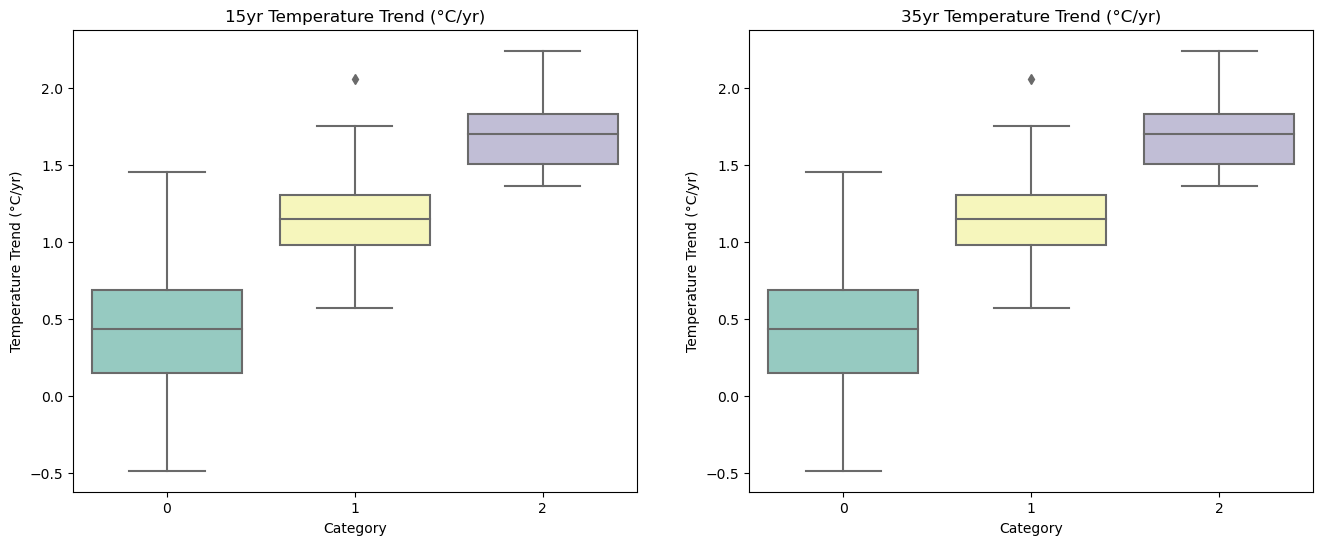

In [52]:
# grouped boxplot
import seaborn as sns

# create a list of the three categories
categories = ['15yr', '35yr', '65yr']

# create a list of the three datasets
data = [DJF_15yr, DJF_35yr, DJF_65yr]

# create a list of the colors for each category
colors = ['red', 'green', 'blue']

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# loop over the subplots
for i, ax in enumerate([ax1, ax2]):
    # create a boxplot for the current subplot
    sns.boxplot(data=data, palette="Set3", ax=ax)
    # overlay a stripplot for the current subplot
    sns.stripplot(data=data, color=colors[i], size=3, ax=ax)
    # set the x-axis label for the current subplot
    ax.set_xlabel('Category')
    # set the y-axis label for the current subplot
    ax.set_ylabel('Temperature Trend (°C/yr)')
    # set the title for the current subplot
    ax.set_title(f'{categories[i]} Temperature Trend (°C/yr)')

# show the plot
plt.show()